<a href="https://colab.research.google.com/github/gillesvtsilvano/100-Days-Of-ML-Code/blob/master/100_Days_of_ML_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! rm -rf 100-Days-Of-ML-Code && git clone https://github.com/gillesvtsilvano/100-Days-Of-ML-Code

Cloning into '100-Days-Of-ML-Code'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 369 (delta 2), reused 0 (delta 0), pack-reused 363
Receiving objects: 100% (369/369), 10.71 MiB | 33.22 MiB/s, done.
Resolving deltas: 100% (183/183), done.


In [0]:
import os
os.chdir('100-Days-Of-ML-Code')

# Day 1: Data PreProcessing

## Step 1: Importing Libraries

In [0]:
import numpy as np
import pandas as pd

## Step 2: Importing dataset

In [0]:
dataset = pd.read_csv('datasets/Data.csv')

# All features but the target variable
X = dataset.iloc[:, :-1].values
# Only the target variables
Y = dataset.iloc[:, -1].values

## Step 3: Handling the missing data

In [0]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values = "NaN", strategy = "mean", axis = 0)
imputer = imputer.fit(X[:, 1:])
X[: , 1:3] = imputer.transform(X[:, 1:3])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## Step 4: Encoding categorical data

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
X[ : , 0] = labelencoder_X.fit_transform(X[ : , 0])

In [0]:
ohe = OneHotEncoder(categorical_features = [0])
X = ohe.fit_transform(X).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

## Step 5: Splitting the datasets into training sets and Test sets

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)

## Step 6: Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler(with_mean=True)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [0]:
X_test

array([[ 0.,  0.,  0., -1., -1.],
       [ 0.,  0.,  0.,  1.,  1.]])

# Day 2: Simple Linear Regression

## Step 1: Data Preprocessing

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('datasets/studentscores.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

## Fitting Simple Linear Regression Model to the training set

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

## Step 3: Predicting the Result

In [0]:
Y_pred = regressor.predict(X_test)

## Step 4: Visualising the Training Results

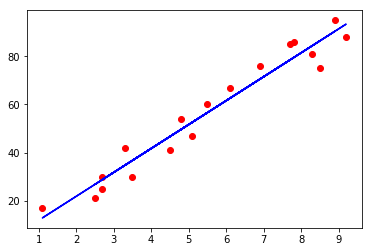

In [0]:
plt.scatter(X_train, Y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')

## Step 5: Visualising the Test Results

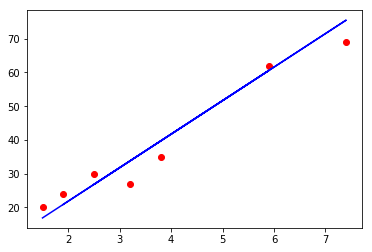

In [0]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, regressor.predict(X_test), color='blue')

# Day 3: Multiple Linear Regression

## Step 1: Data Preprocessing

In [0]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('datasets/50_Startups.csv')
print(dataset.head())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [0]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[: , 3])
ohe = OneHotEncoder(categorical_features = [3])
X = ohe.fit_transform(X).toarray()[:, 1:] # Avoiding dummy trap

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Step 2: Fitting Multiple Linear Regression to the Training Set

In [0]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Step 3: Predicint the Treining set Result

In [0]:
Y_pred = regressor.predict(X_test)
print(regressor.score(X_test,Y_test))

0.9347068473282986


In [0]:
for test,pred in zip(Y_test,Y_pred):
  print(test, pred)

103282.38 103015.20159796216
144259.4 132582.27760815847
146121.95 132447.73845174976
77798.83 71976.09851258763
191050.39 178537.4822105438
105008.31 116161.24230163351
81229.06 67851.69209676176
97483.56 98791.73374687924
110352.25 113969.43533011667
166187.94 167921.06569550227
